# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [16]:
#LOAD THE DATA
import pandas as pd
import numpy as np

df = pd.read_csv("water_potability.csv")
#Display info
print(df.info())
print(df.head())

import tensorflow as tf # Import tensorflow here
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.

Plot the Data Appropriately

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Handle missing values with KNN imputation
imputer = KNNImputer(n_neighbors=5)
# Replace 'data' with 'df' in the following line:
data_imputed = imputer.fit_transform(df)  # Use the DataFrame 'df' here
data = pd.DataFrame(data_imputed, columns=df.columns)  # Use df.columns

# Split features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

# generate 2d classification dataset


# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
#from sklearn import train_test_split

from sklearn.model_selection import train_test_split


# Split into Train, Validation, and Test sets (70%-15%-15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Each Memeber Defines their model Here

In [33]:
# Define the model
def create_model(dropout_rate=0.0, regularizer=None):  # Add parameters for dropout and regularizer
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizer),
        layers.Dropout(dropout_rate),  # Add dropout layer
        layers.Dense(8, activation='relu', kernel_regularizer=regularizer),
        layers.Dropout(dropout_rate),  # Add dropout layer
        layers.Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6897 - loss: 0.5924 - val_accuracy: 0.6864 - val_loss: 0.5878
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6826 - loss: 0.5852 - val_accuracy: 0.6884 - val_loss: 0.5883
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6910 - loss: 0.5789 - val_accuracy: 0.6843 - val_loss: 0.5880
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7058 - loss: 0.5684 - val_accuracy: 0.6843 - val_loss: 0.5887
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6871 - loss: 0.5842 - val_accuracy: 0.6843 - val_loss: 0.5890
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.5705 - val_accuracy: 0.6823 - val_loss: 0.5910
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7008 - loss: 0.5809 - val_accuracy: 0.6762 - val_loss: 0.5895
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.5656 - val_accuracy: 0.6823 - v

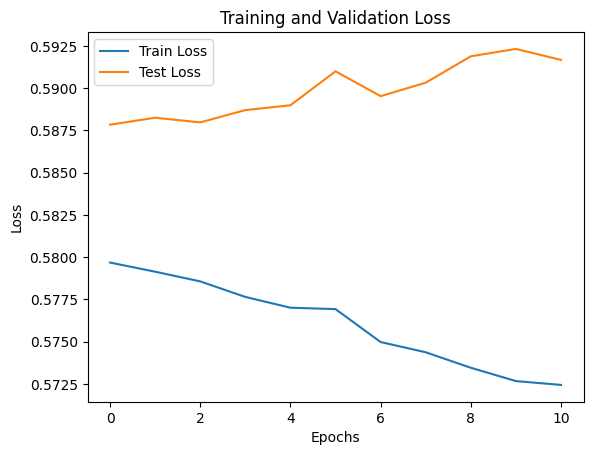

In [35]:
# Create and Train the Model
import matplotlib.pyplot as plt #Import plotting library
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Assuming X_train, y_train, X_test, y_test are your training and testing data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[early_stopping])

# Evaluate the Model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_val, y_val, verbose=0) #Changed to X_val and y_val to prevent data leakage
print(f'Train: {train_acc:.3f}, Test: {test_acc:.3f}')

# Plot Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss') #Changed to 'val_loss' for validation loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [43]:
results = train_and_evaluate_model(...)
print(results['Train Instance'])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5737 - loss: 0.6766 - val_accuracy: 0.6008 - val_loss: 0.6706
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5787 - loss: 0.6797 - val_accuracy: 0.6171 - val_loss: 0.6655
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5939 - loss: 0.6714 - val_accuracy: 0.6191 - val_loss: 0.6624
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6093 - loss: 0.6644 - val_accuracy: 0.6232 - val_loss: 0.6599
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6067 - loss: 0.6604 - val_accuracy: 0.6232 - val_loss: 0.6568
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6223 - loss: 0.6586 - val_accuracy: 0.6354 - val_loss: 0.6535
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6232 - loss: 0.6521 - val_accuracy: 0.6314 - val_loss: 0.6497
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6304 - loss: 0.6557 - val_accuracy: 0.6456 - val_loss: 0.6

In [45]:
# Function to train and evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #Import recall_score, precision_score here
def train_and_evaluate_model(engineer_name, regularizer=None, optimizer='adam', early_stopping=True, dropout_rate=0.0):
    model = create_model(dropout_rate, regularizer)

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = []
    if early_stopping:
        callbacks.append(keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True))

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=callbacks)

    # Evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_val, y_val, verbose=0)

    # Predictions for F1, Recall, Precision
    y_pred = model.predict(X_val)
    y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

    f1 = f1_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary) #Now recall_score is defined and can be used
    precision = precision_score(y_val, y_pred_binary) #precision_score also needs to be imported

    # Store results in a dictionary
    results = {
        'Train Instance': engineer_name,
        'Regularizer': regularizer.__name__ if regularizer else None,  # Get regularizer name
        'Optimizer': optimizer,
        'Early Stopping': early_stopping,
        'Dropout Rate': dropout_rate,
        'Accuracy': test_acc,
        'F1 Score': f1,
        'Recall': recall,
        'Precision': precision
    }

    return results

In [49]:
results = train_and_evaluate_model(engineer_name="Valentine", regularizer=regularizers.l2(0.01),
                                   optimizer='adam', early_stopping=True, dropout_rate=0.2)

print(results)  # Print the entire results dictionary
print(results['Train Instance'])  # Print the value of 'Train Instance'
print(results['Accuracy'])  # Print the value of 'Accuracy'
# ... and so on for other columns ...

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5961 - loss: 0.9124 - val_accuracy: 0.6049 - val_loss: 0.8347
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5630 - loss: 0.8523 - val_accuracy: 0.6130 - val_loss: 0.8042
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5810 - loss: 0.8127 - val_accuracy: 0.6273 - val_loss: 0.7782
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5954 - loss: 0.7852 - val_accuracy: 0.6314 - val_loss: 0.7564
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6053 - loss: 0.7575 - val_accuracy: 0.6314 - val_loss: 0.7390
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6095 - loss: 0.7447 - val_accuracy: 0.6314 - val_loss: 0.7240
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6083 - loss: 0.7239 - val_accuracy: 0.6314 - val_loss: 0.7117
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6019 - loss: 0.7218 - val_accuracy: 0.6314 - val_loss: 0.7